<a href="https://colab.research.google.com/github/zeineb-ouerghi/Duolingo/blob/master/Problem_Set_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assumptions🇰
* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

Importing libraries

In [27]:
#importing libraries and packages 
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

Data of the control group🇰

|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


In [29]:
#size of the control group 
controlgroup_size = [15,18,10,39,29,10]
#success count in the control groups
controlgroup_success = [9,11,4,21,12,0]

Generate posterior data samples from the model

In [50]:
def nonhierarchical_rvs(n):
    data = []
    # generate n fake data sets
    for i in range(n): 
        #sample a probability theta_c from the posterior
        p = sts.beta.rvs(58,65, size = 1)
        sample = []
        # generat groups of the same size as the original control groups
        for i in controlgroup_size:
            sample.append(sts.binom.rvs(i,p))
        data.append(sample)
    return data

We make the 100000 simulations for the samples

In [37]:
posteriordata = nonhierarchical_rvs(100000)
posteriordata

[[5, 4, 3, 17, 11, 3],
 [8, 12, 7, 22, 15, 7],
 [6, 13, 5, 17, 9, 4],
 [8, 5, 4, 18, 15, 3],
 [6, 8, 3, 14, 13, 4],
 [7, 4, 5, 15, 14, 4],
 [5, 8, 4, 21, 14, 2],
 [5, 10, 5, 18, 17, 2],
 [5, 5, 5, 17, 7, 2],
 [5, 7, 5, 22, 15, 6],
 [5, 6, 4, 22, 11, 4],
 [6, 9, 4, 22, 20, 4],
 [3, 7, 4, 14, 11, 3],
 [7, 9, 2, 19, 13, 7],
 [10, 8, 4, 22, 9, 5],
 [5, 6, 7, 19, 13, 5],
 [9, 9, 4, 22, 14, 5],
 [9, 6, 4, 18, 13, 7],
 [5, 8, 4, 18, 7, 5],
 [3, 11, 3, 13, 15, 3],
 [5, 6, 5, 15, 13, 3],
 [7, 10, 3, 16, 15, 2],
 [4, 8, 4, 17, 9, 2],
 [8, 9, 4, 20, 14, 7],
 [9, 8, 7, 23, 16, 1],
 [9, 12, 5, 15, 10, 3],
 [9, 10, 3, 23, 15, 4],
 [5, 6, 5, 18, 13, 3],
 [5, 9, 7, 15, 14, 6],
 [7, 6, 2, 21, 13, 6],
 [8, 12, 5, 17, 19, 6],
 [7, 12, 6, 19, 16, 3],
 [6, 5, 6, 16, 16, 5],
 [5, 10, 5, 18, 19, 3],
 [6, 10, 8, 16, 11, 7],
 [4, 8, 5, 15, 9, 2],
 [5, 8, 5, 17, 11, 7],
 [9, 9, 4, 20, 14, 3],
 [4, 5, 2, 14, 16, 4],
 [7, 6, 8, 19, 14, 5],
 [10, 12, 4, 19, 15, 4],
 [5, 6, 4, 16, 11, 5],
 [6, 10, 4, 14, 11, 8],
 [

In [31]:
#Get the mean and the range between 
#the maximum success rate minus the minimum success rate
def test_statistic(data,name):
    stats = {'range': np.ptp,
            'mean' : np.mean,}
    return stats[name](data)

We calculate ehte test statistic for the data set of the control group and the osterior samples 


In [47]:
def calculate_test_stat(posterior_samples, data, name):
    # calculate the test statistic for the posterior samples
    # and the control group data
    test_statistic_posterior = [test_statistic(x, name) for x in posterior_data]
    test_statistic_control = test_statistic(controlgroup_success, name)

    # create plot
    plt.hist(test_statistic_posterior, label = 'Posterior samples', color = 'green')
    plt.axvline(test_statistic_control, color = 'Red',label = 'data')
    plt.xlabel(name)
    plt.title('{} Test statistic  distribution'.format(name))
    plt.show()
    
    # calculate p-value
    print('The',name,'statistic p-value is %.3f' % (
    np.mean(np.array(test_statistic_posterior) > test_statistic_control)))

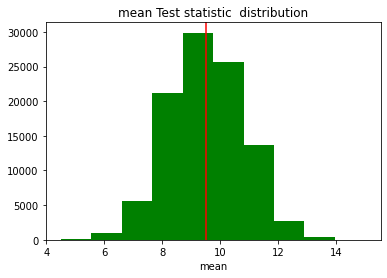

The mean statistic p-value is 0.476


In [48]:
calculate_test_stat(posteriordata, controlgroup_success,'mean')

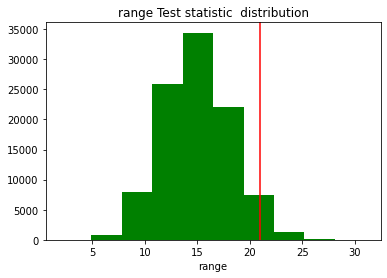

The range statistic p-value is 0.027


In [49]:
calculate_test_stat(posteriordata, controlgroup_success,'range')

OVERALL: In order to highlight the deficiency of the model, the p-value needs to be either less than 0.05 or greater than 0.95. 
We generate 100000 sample datasets with the provided initial dataset of the patients. We can look at the test statistics which are the mean and the difference between the maximum and minimum which is the range. The mean statistic p-value returns a value of 0.47 which is very close to 0.5. This does not entirely confirm the deficiency of the model. Hence, we look at the range of the values which capture the difference between the maximum and minimum values of each data set. The range statistic p-value is 0.027. This is a very low value, under the threshold of 0.05. We can explain that by the inability of the model to accurately capture values in the dataset.